___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Ingest the data to notebook

In [79]:
df=pd.read_csv("heart.csv")

# EDA

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [83]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [84]:
df.drop_duplicates(inplace=True)

In [85]:
df.duplicated().value_counts()

False    302
dtype: int64

In [86]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [87]:
df.corrwith(df.target)

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
dtype: float64

In [88]:
df.shape

(302, 14)

In [89]:
df.ndim

2

# Data Preprocessing

In [90]:
df_cp = pd.get_dummies(df.cp,prefix="cp_value")
df_sl = pd.get_dummies(df.slope,prefix="sl_value")
df_rst = pd.get_dummies(df.restecg,prefix="rst_value")
df_th = pd.get_dummies(df.thal,prefix="th_value")

In [91]:
df=df.join(df_cp)
df=df.join(df_sl)
df=df.join(df_rst)
df=df.join(df_th)

In [92]:
df=df.drop (["cp","slope","thal","restecg"],axis=1)

In [93]:
df.head().T

,0,1,2,3,4
age,63.0,37.0,41.0,56.0,57.0
sex,1.0,1.0,0.0,1.0,0.0
trestbps,145.0,130.0,130.0,120.0,120.0
chol,233.0,250.0,204.0,236.0,354.0
fbs,1.0,0.0,0.0,0.0,0.0
thalach,150.0,187.0,172.0,178.0,163.0
exang,0.0,0.0,0.0,0.0,1.0
oldpeak,2.3,3.5,1.4,0.8,0.6
ca,0.0,0.0,0.0,0.0,0.0
target,1.0,1.0,1.0,1.0,1.0


# Implement Logistic Regression and Evaluate

In [94]:
X = df.drop('target',axis=1)
y = df['target']

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
log_model = LogisticRegression()

In [99]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [100]:
log_model.coef_

array([[ 2.24893832e-02, -8.11319595e-01, -1.82614896e-02,
        -1.92503592e-03,  2.11198743e-01,  2.30907024e-02,
        -7.06945953e-01, -3.92615963e-01, -7.43862343e-01,
        -8.80202246e-01, -4.62093969e-04,  7.30247193e-01,
         1.62037552e-01, -2.85304147e-02, -3.92851922e-01,
         4.33002743e-01, -2.80013364e-01,  2.95423632e-01,
        -3.78986212e-03,  3.57358189e-02,  8.27291029e-02,
         7.22753759e-01, -8.29598275e-01]])

In [101]:
log_model.intercept_

array([0.00925956])

In [105]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [106]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.96666071e-01, 3.33392950e-03],
       [8.53632514e-01, 1.46367486e-01],
       [1.33720047e-01, 8.66279953e-01],
       [9.50883612e-01, 4.91163881e-02],
       [3.41707400e-03, 9.96582926e-01],
       [9.31937240e-03, 9.90680628e-01],
       [6.92798329e-01, 3.07201671e-01],
       [9.98067825e-01, 1.93217489e-03],
       [9.94299190e-01, 5.70080987e-03],
       [1.03939481e-01, 8.96060519e-01],
       [7.37574848e-01, 2.62425152e-01],
       [9.30774443e-01, 6.92255567e-02],
       [2.72550070e-02, 9.72744993e-01],
       [9.85059596e-01, 1.49404037e-02],
       [4.71018047e-03, 9.95289820e-01],
       [1.69152048e-02, 9.83084795e-01],
       [6.15890205e-03, 9.93841098e-01],
       [9.99714486e-01, 2.85514038e-04],
       [9.98782486e-01, 1.21751414e-03],
       [9.89354762e-01, 1.06452375e-02],
       [8.77053413e-01, 1.22946587e-01],
       [9.93081811e-01, 6.91818866e-03],
       [5.48085920e-01, 4.51914080e-01],
       [2.43608657e-02, 9.75639134e-01],
       [1.225926

In [107]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_value_0,...,sl_value_1,sl_value_2,rst_value_0,rst_value_1,rst_value_2,th_value_0,th_value_1,th_value_2,th_value_3,target
180,55,1,132,353,0,132,1,1.2,1,1,...,1,0,0,1,0,0,0,0,1,0
229,64,1,125,309,0,131,1,1.8,0,0,...,1,0,0,1,0,0,0,0,1,0
111,57,1,150,126,1,173,0,0.2,1,0,...,0,1,0,1,0,0,0,0,1,1
247,66,1,160,246,0,120,1,0.0,3,0,...,1,0,0,1,0,0,1,0,0,0
60,71,0,110,265,1,130,0,0.0,1,0,...,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,140,298,0,122,1,4.2,3,1,...,1,0,0,1,0,0,0,0,1,0
104,50,1,129,196,0,163,0,0.0,0,0,...,0,1,0,1,0,0,0,1,0,1
300,68,1,144,193,1,141,0,3.4,2,1,...,1,0,0,1,0,0,0,0,1,0
194,60,1,140,185,0,155,0,3.0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [108]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_value_0,...,sl_value_2,rst_value_0,rst_value_1,rst_value_2,th_value_0,th_value_1,th_value_2,th_value_3,target,pred_proba
180,55,1,132,353,0,132,1,1.2,1,1,...,0,0,1,0,0,0,0,1,0,0.003334
229,64,1,125,309,0,131,1,1.8,0,0,...,0,0,1,0,0,0,0,1,0,0.146367
111,57,1,150,126,1,173,0,0.2,1,0,...,1,0,1,0,0,0,0,1,1,0.866280
247,66,1,160,246,0,120,1,0.0,3,0,...,0,0,1,0,0,1,0,0,0,0.049116
60,71,0,110,265,1,130,0,0.0,1,0,...,1,1,0,0,0,0,1,0,1,0.996583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,51,1,140,298,0,122,1,4.2,3,1,...,0,0,1,0,0,0,0,1,0,0.000249
104,50,1,129,196,0,163,0,0.0,0,0,...,1,0,1,0,0,0,1,0,1,0.994640
300,68,1,144,193,1,141,0,3.4,2,1,...,0,0,1,0,0,0,0,1,0,0.006445
194,60,1,140,185,0,155,0,3.0,0,0,...,0,1,0,0,0,0,1,0,0,0.796269


In [109]:
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_value_0,...,sl_value_2,rst_value_0,rst_value_1,rst_value_2,th_value_0,th_value_1,th_value_2,th_value_3,target,pred_proba
292,58,0,170,225,1,146,1,2.8,2,1,...,0,1,0,0,0,1,0,0,0,0.022097
268,54,1,122,286,0,116,1,3.2,2,1,...,0,1,0,0,0,0,1,0,0,0.005701
77,59,1,140,221,0,164,1,0.0,0,0,...,1,0,1,0,0,0,1,0,1,0.890824
78,52,1,128,205,1,184,0,0.0,0,0,...,1,0,1,0,0,0,1,0,1,0.986299
92,52,1,138,223,0,169,0,0.0,4,0,...,1,0,1,0,0,0,1,0,1,0.900148
199,65,1,110,248,0,158,0,0.6,2,1,...,1,1,0,0,0,1,0,0,0,0.113658
60,71,0,110,265,1,130,0,0.0,1,0,...,1,1,0,0,0,0,1,0,1,0.996583
101,59,1,178,270,0,145,0,4.2,0,0,...,0,1,0,0,0,0,0,1,1,0.069226
232,55,1,160,289,0,145,1,0.8,1,1,...,0,1,0,0,0,0,0,1,0,0.001201
146,44,0,118,242,0,149,0,0.3,1,0,...,0,0,1,0,0,0,1,0,1,0.987741


In [110]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [111]:
accuracy_score(y_test,y_pred)

0.8524590163934426

In [112]:
log_model.score(X_test_scaled, y_test)

0.8524590163934426

In [113]:
precision_score(y_test, y_pred)

0.96

In [114]:
recall_score(y_test, y_pred)

0.75

In [115]:
f1_score(y_test,y_pred)

0.8421052631578947

In [116]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [117]:
confusion_matrix(y_test,y_pred)

array([[28,  1],
       [ 8, 24]], dtype=int64)

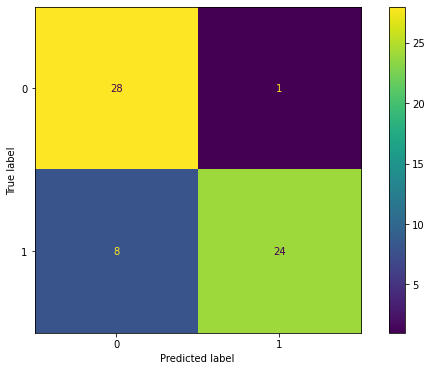

In [118]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

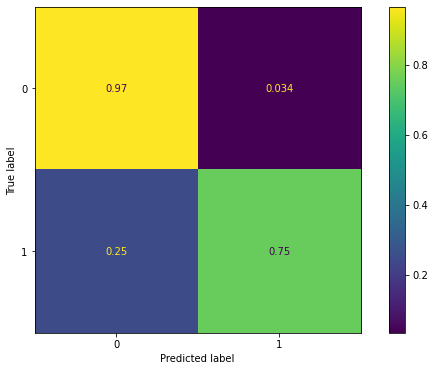

In [119]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

In [120]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.96      0.75      0.84        32

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [121]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.85      0.84      0.85       132

    accuracy                           0.83       241
   macro avg       0.83      0.83      0.83       241
weighted avg       0.83      0.83      0.83       241



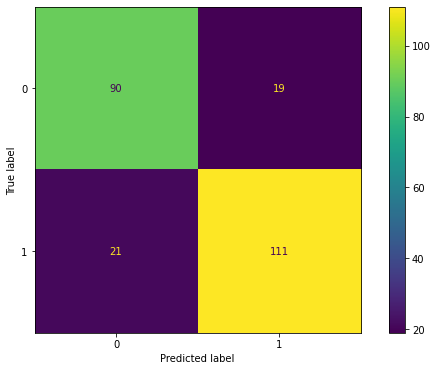

In [122]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

In [123]:
from sklearn.model_selection import cross_validate

In [124]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [125]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.015619,0.002078,0.840000,0.812500,0.928571,0.866667
2,0.008032,0.008008,0.791667,0.846154,0.785714,0.814815
3,0.015997,0.008288,0.916667,0.866667,1.000000,0.928571
4,0.008009,0.000000,0.750000,0.818182,0.692308,0.750000
5,0.007706,0.007997,0.750000,0.769231,0.769231,0.769231
6,0.008004,0.008366,0.791667,0.785714,0.846154,0.814815
7,0.007628,0.008007,0.875000,0.857143,0.923077,0.888889
8,0.007993,0.000000,0.875000,0.857143,0.923077,0.888889
9,0.008012,0.007986,0.833333,1.000000,0.692308,0.818182
10,0.008029,0.007969,0.708333,0.687500,0.846154,0.758621


In [126]:
df_scores.mean()[2:]

test_accuracy     0.813167
test_precision    0.830023
test_recall       0.840659
test_f1           0.829868
dtype: float64

In [127]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.96      0.75      0.84        32

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

Train Set

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.85      0.84      0.85       132

    accuracy                           0.83       241
   macro avg       0.83      0.83      0.83       241
weighted avg       0.83      0.83      0.83       241



In [128]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

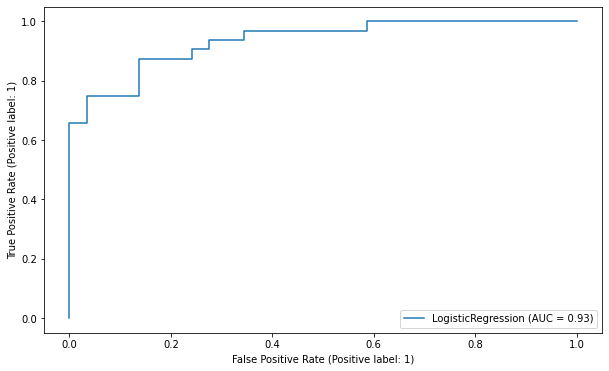

In [129]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [130]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9342672413793104

In [131]:
roc_auc_score(y_test, y_pred)

0.8577586206896552

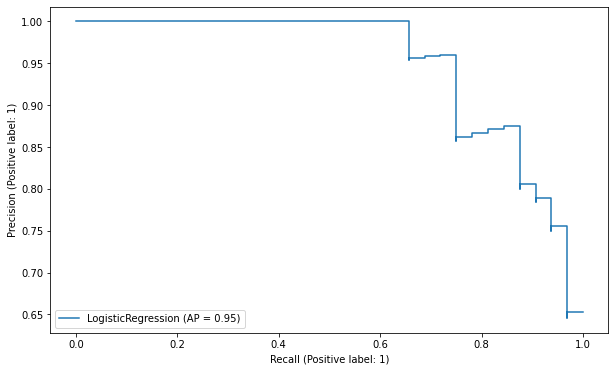

In [132]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

# Visually compare models based on your chosen metric

# Chose best model and make a random prediction 